In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('df1.csv')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

Нормализуем данные

In [3]:
from sklearn import preprocessing

In [4]:
scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

Unnamed: 0  Тип рынка  Функциональная зона  Общая площадь,\nкв.м  \
0    0.000000        1.0                  0.0              0.054050   
1    0.000397        1.0                  0.0              0.041332   
2    0.000795        1.0                  0.0              0.066934   
3    0.001192        1.0                  0.0              0.071285   
4    0.001589        1.0                  0.0              0.049531   

   Жилая площадь,\nкв.м  Площадь кухни,\nкв.м  Год постройки  Тип дома  \
0              0.104253              0.070175       0.546296      0.25   
1              0.080394              0.070175       0.537037      0.25   
2              0.092324              0.192982       0.842593      0.50   
3              0.134855              0.098246       0.388889      0.00   
4              0.061203              0.157895       0.861111      0.50   

      Класс      Этаж  ...  Центр\nкм  Станция метро\nм  Школа\nм  \
0  0.666667  0.291667  ...   0.684211          0.514534  0.030112   
1  0.666667  0.125000  ...   0.526316          0.077231  0.098365   
2  0.666667  0.041667  ...   0.105263          0.134345  0.105822   
3  0.666667  0.166667  ...   0.473684          0.011593  0.075423   
4  0.666667  0.000000  ...   0.526316          0.254198  0.145397   

   Детский сад\nм  Месяц создания  Год создания  Месяц парсинга  Год парсинга  \
0        0.030415        0.727273           0.0        0.727273           0.0   
1        0.043318        0.727273           0.0        0.727273           0.0   
2        0.070737        0.727273           0.0        0.727273           0.0   
3        0.004147        0.727273           0.0        0.727273           0.0   
4        0.048157        0.727273           0.0        0.727273           0.0   

   Месяц последней проверки  Год последней проверки  
0                  0.727273                     0.0  
1                  0.727273                     0.0  
2                  0.727273                     0.0  
3                  0.727273                     0.0  
4                  0.727273                     0.0  

[5 rows x 32 columns]

Разделим выборку на обучающую и тестовую

In [5]:
X = df[['Тип рынка', 'Функциональная зона','Общая площадь,\nкв.м', 'Жилая площадь,\nкв.м', 'Площадь кухни,\nкв.м',
       'Год постройки', 'Тип дома', 'Класс', 'Этаж', 'Этажность', 'Тип этажа',
       'Количество комнат', 'Парковка', 'Материал стен','Актуальность на дату послед. проверки', 'Колич.  Просмотр.',
       'Колич.  Просм. в день', 'Остановка\nм', 'Парк\nм', 'Центр\nкм',
       'Станция метро\nм', 'Школа\nм', 'Детский сад\nм', 'Месяц создания',
       'Год создания', 'Месяц парсинга', 'Год парсинга',
       'Месяц последней проверки', 'Год последней проверки']]
Y = df['Удельная цена, руб./кв.м']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=52)

Создадим и обучим модель

In [6]:
modelDecisionTree = DecisionTreeRegressor()

In [7]:
modelDecisionTree.fit(X_train, Y_train)
yDecisionTree = modelDecisionTree.predict(X_test)

Выведем процент ошибки на тестовой выборке

In [8]:
MdAPE_test = np.median((np.abs(np.subtract(Y_test,modelDecisionTree.predict(X_test))/Y_test)))*100
print(MdAPE_test)

14.242374599321595


Построим дерево

In [9]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [11]:
conda install -c conda-forge pydotplus

Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.3.1




In [12]:
#from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.248634 to fit



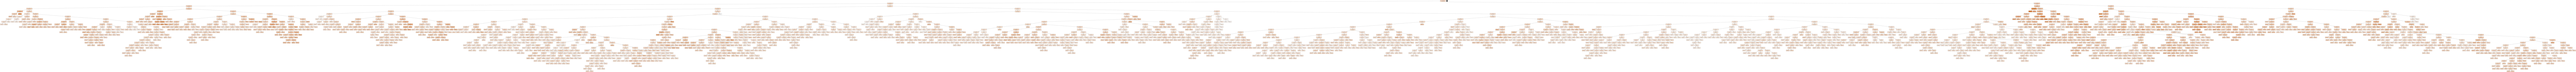

In [13]:
dot_data = StringIO()
export_graphviz(modelDecisionTree, out_file=dot_data, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Ограничим параметры классификатора

In [14]:
modelDecisionTree2 = DecisionTreeRegressor(max_depth = 4)
modelDecisionTree2.fit(X_train, Y_train)
yDecisionTree2 = modelDecisionTree2.predict(X_test)

Выведем процент ошибки на тестовой выборке

In [15]:
MdAPE_test2 = np.median((np.abs(np.subtract(Y_test,modelDecisionTree2.predict(X_test))/Y_test)))*100
print(MdAPE_test2)

12.34051480361898


Построим дерево

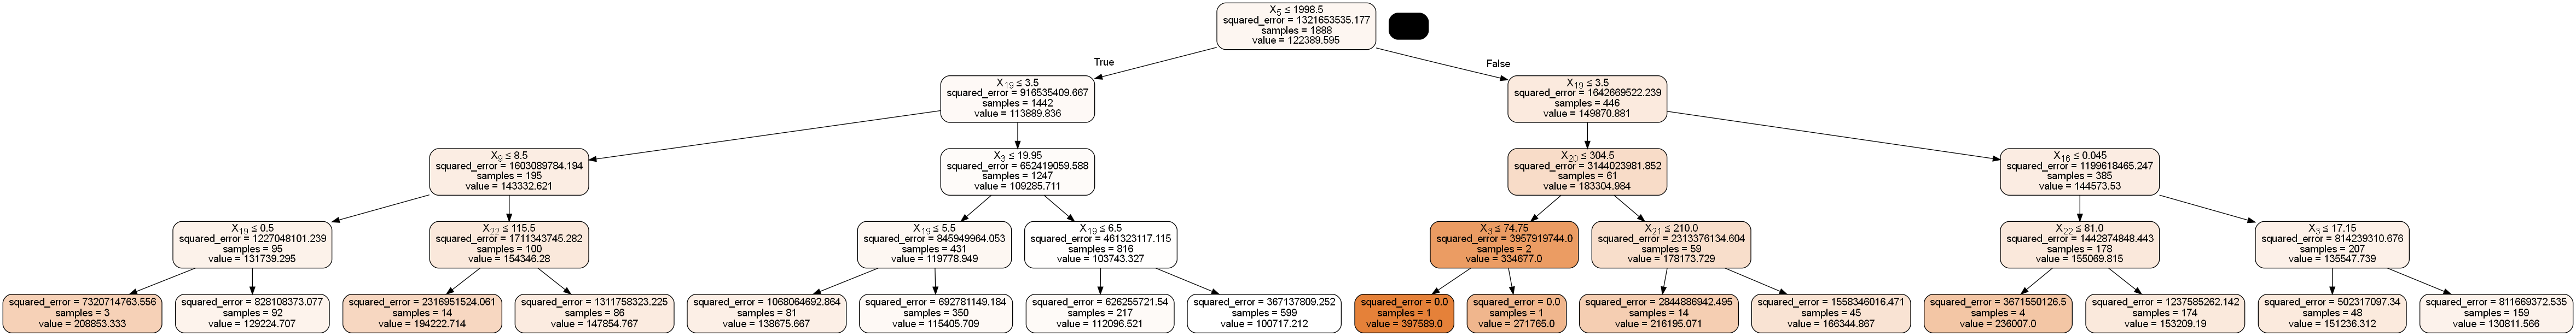

In [16]:
dot_data = StringIO()
export_graphviz(modelDecisionTree2, out_file=dot_data, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Task 2

Подобрать гиперпараметры модели DecissionTree

In [7]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [18]:
modelDecisionTree2 = DecisionTreeRegressor()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
param = {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [4, 3, 2, 5, 6, 7, 8, 9],
    'max_features':['auto', 'sqrt', 'log2'],
    'splitter':['best', 'random']
}

search = GridSearchCV(modelDecisionTree2, param, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, verbose = 10)
result = search.fit(X, Y)

Fitting 30 folds for each of 192 candidates, totalling 5760 fits


In [19]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -20237.902976980964
Best Hyperparameters: {'criterion': 'absolute_error', 'max_depth': 7, 'max_features': 'auto', 'splitter': 'random'}


Построить графики зависимости mdape от глубины дерева, max_leaf_nodes, min_samples_leaf и от min_samples_split

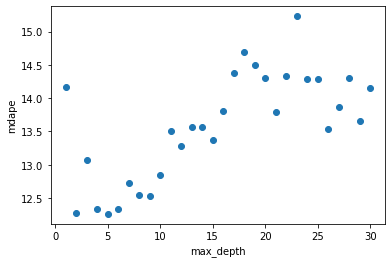

In [20]:
x = [0] * 30
y = [0] * 30

for i in range (1, 31):
    x[i-1] = i
    modelDecisionTree3 = DecisionTreeRegressor(max_depth = i)
    modelDecisionTree3.fit(X_train, Y_train)
    MdAPE_test3 = np.median((np.abs(np.subtract(Y_test,modelDecisionTree3.predict(X_test))/Y_test)))*100
    y[i-1] = MdAPE_test3
    
plt.plot(x, y, "o")
plt.xlabel("max_depth")
plt.ylabel("mdape")
plt.show()

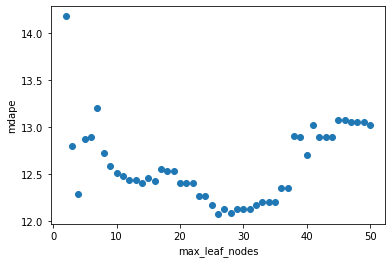

In [21]:
x = [0] * 49
y = [0] * 49

for i in range (2, 51):
    x[i-2] = i
    modelDecisionTree4 = DecisionTreeRegressor(max_leaf_nodes = i)
    modelDecisionTree4.fit(X_train, Y_train)
    MdAPE_test4 = np.median((np.abs(np.subtract(Y_test,modelDecisionTree4.predict(X_test))/Y_test)))*100
    y[i-2] = MdAPE_test4
    
plt.plot(x, y, "o")
plt.xlabel("max_leaf_nodes")
plt.ylabel("mdape")
plt.show()

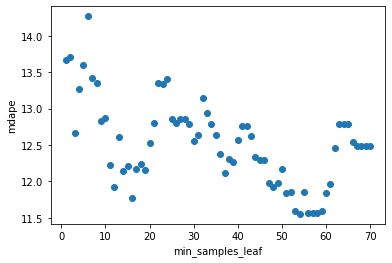

In [22]:
x = [0] * 70
y = [0] * 70

for i in range (1, 71):
    x[i-1] = i
    modelDecisionTree3 = DecisionTreeRegressor(min_samples_leaf = i)
    modelDecisionTree3.fit(X_train, Y_train)
    MdAPE_test3 = np.median((np.abs(np.subtract(Y_test,modelDecisionTree3.predict(X_test))/Y_test)))*100
    y[i-1] = MdAPE_test3
    
plt.plot(x, y, "o")
plt.xlabel("min_samples_leaf")
plt.ylabel("mdape")
plt.show()

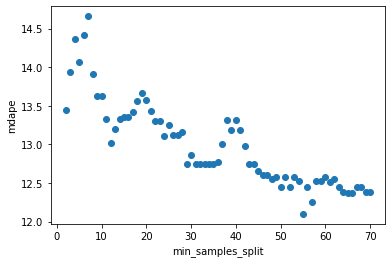

In [23]:
x = [0] * 69
y = [0] * 69

for i in range (2, 71):
    x[i-2] = i
    modelDecisionTree3 = DecisionTreeRegressor(min_samples_split = i)
    modelDecisionTree3.fit(X_train, Y_train)
    MdAPE_test3 = np.median((np.abs(np.subtract(Y_test,modelDecisionTree3.predict(X_test))/Y_test)))*100
    y[i-2] = MdAPE_test3
    
plt.plot(x, y, "o")
plt.xlabel("min_samples_split")
plt.ylabel("mdape")
plt.show()

# Task 3

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

In [25]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
yrf = rf.predict(X_test)

Выведем процент ошибки на тестовой выборке

In [26]:
rfMdAPE_test = np.median((np.abs(np.subtract(Y_test,rf.predict(X_test))/Y_test)))*100
print(rfMdAPE_test)

11.17970562902292


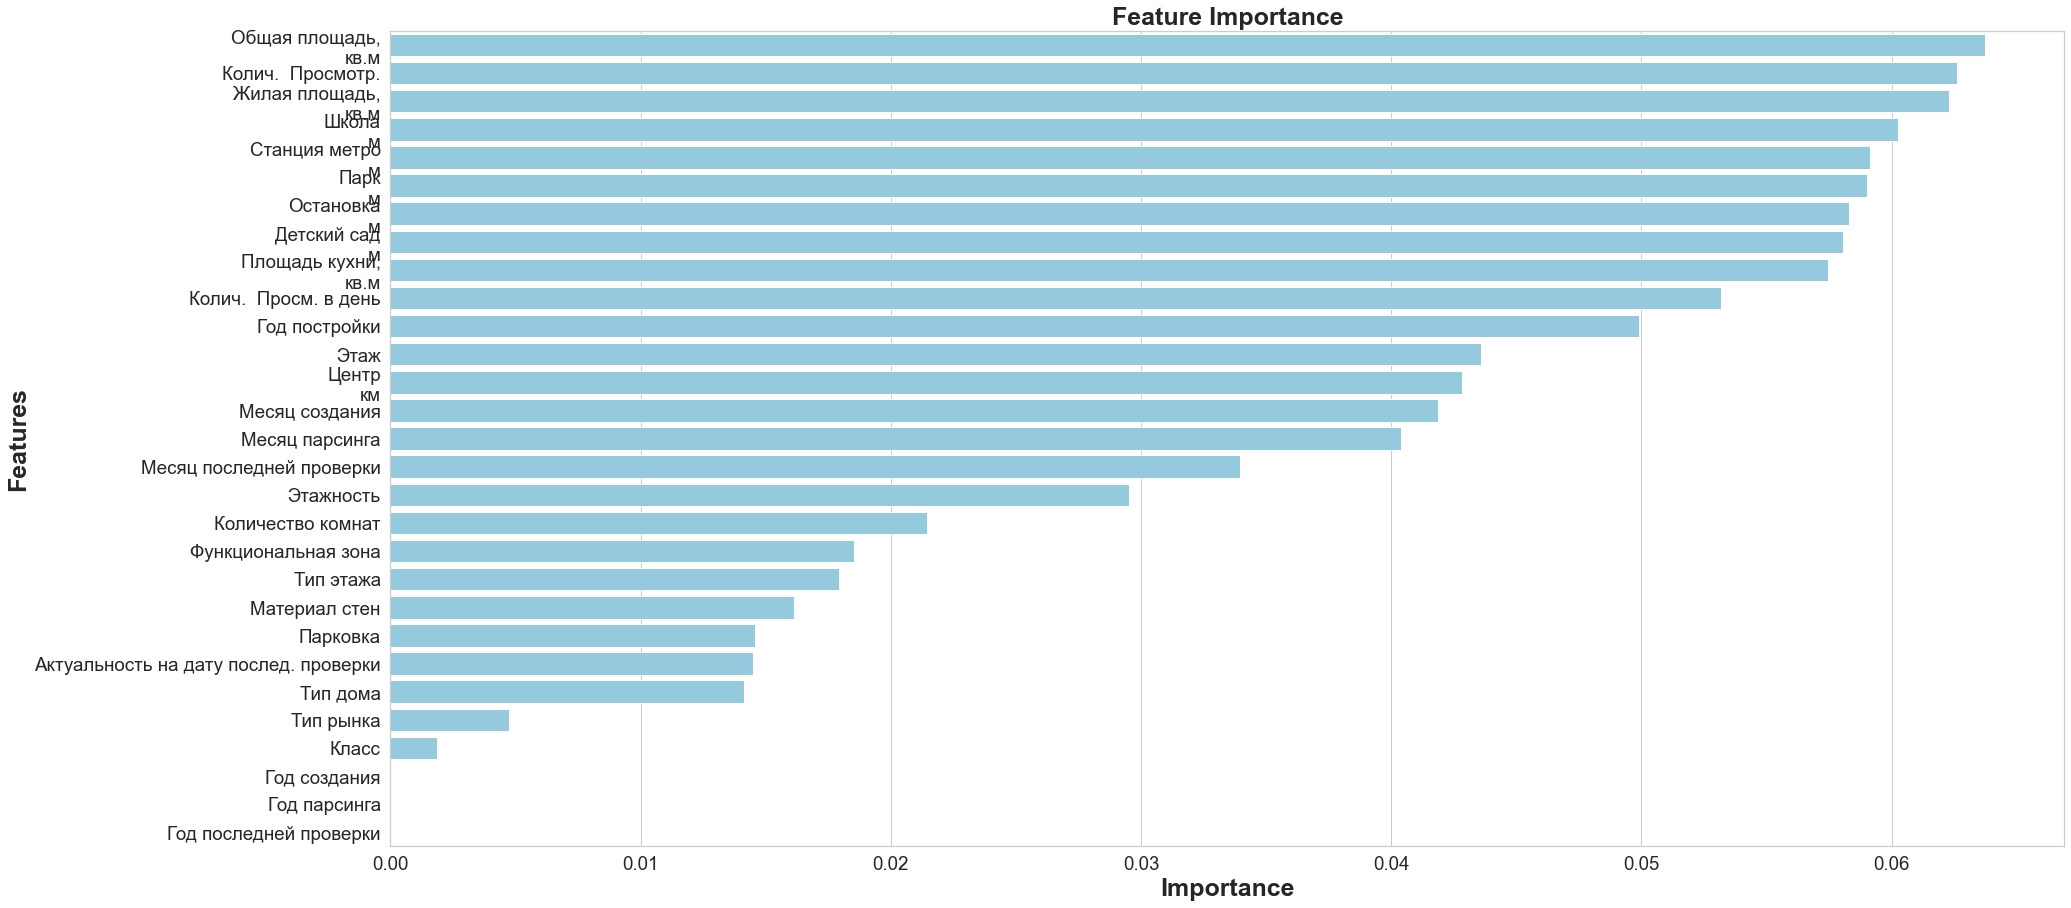

None

Features  Gini-Importance
0                    Общая площадь,\nкв.м         0.063718
1                       Колич.  Просмотр.         0.062619
2                    Жилая площадь,\nкв.м         0.062295
3                                Школа\nм         0.060268
4                        Станция метро\nм         0.059145
5                                 Парк\nм         0.059008
6                            Остановка\nм         0.058282
7                          Детский сад\nм         0.058039
8                    Площадь кухни,\nкв.м         0.057468
9                   Колич.  Просм. в день         0.053179
10                          Год постройки         0.049897
11                                   Этаж         0.043600
12                              Центр\nкм         0.042825
13                         Месяц создания         0.041865
14                         Месяц парсинга         0.040375
15               Месяц последней проверки         0.033973
16                              Этажность         0.029513
17                      Количество комнат         0.021459
18                    Функциональная зона         0.018544
19                              Тип этажа         0.017942
20                          Материал стен         0.016144
21                               Парковка         0.014585
22  Актуальность на дату послед. проверки         0.014507
23                               Тип дома         0.014134
24                              Тип рынка         0.004745
25                                  Класс         0.001872
26                           Год создания         0.000000
27                           Год парсинга         0.000000
28                 Год последней проверки         0.000000

In [27]:
import seaborn as sns
feats = {}
for feature, importance in zip(X.columns, rf.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

Общая площадь имеет наибольшую важность; дата создания, год создания и год проверки не лияют на стоимость недвижимости.
Класс имеет наименьшую важность.

# Task 4

Подобрать гиперпараметры модели RandomForest

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
%%time
rf2 = RandomForestRegressor()

cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)
param = {
    'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'n_estimators': [60, 80, 100, 110, 130],
    'max_features':['sqrt', 'log2', None],
    'max_depth':[66, 80, 100, 110, 120, 130, 140, 160, 200],
}

search = GridSearchCV(rf2, param, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, verbose = 10)
result = search.fit(X, Y)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
CPU times: total: 24.4 s
Wall time: 1h 48min 19s


In [31]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -17926.33595083346
Best Hyperparameters: {'criterion': 'absolute_error', 'max_depth': 140, 'max_features': 'sqrt', 'n_estimators': 130}


до подбора гиперпараметров

In [25]:
rf4 = RandomForestRegressor()
rf4.fit(X_train, Y_train)
MdAPE_test = np.median((np.abs(np.subtract(Y_test,rf4.predict(X_test))/Y_test)))*100
print(MdAPE_test)

10.12747980873254


In [27]:
MdAPE_train4 = np.median((np.abs(np.subtract(Y_train,rf4.predict(X_train))/Y_train)))*100
MdAPE_train4

3.8726974914572434

после подбора гиперпараметров

In [32]:
rf5 = RandomForestRegressor(criterion = 'absolute_error', max_depth = 140, max_features = 'sqrt', n_estimators = 130)
rf5.fit(X_train, Y_train)
MdAPE_test = np.median((np.abs(np.subtract(Y_test,rf5.predict(X_test))/Y_test)))*100
print(MdAPE_test)

10.937593119317429


In [33]:
MdAPE_train5 = np.median((np.abs(np.subtract(Y_train,rf5.predict(X_train))/Y_train)))*100
MdAPE_train5

4.125627581604447

Построить графики зависимости mdape от кол-ва деревьев в лесу и от глубины дерева

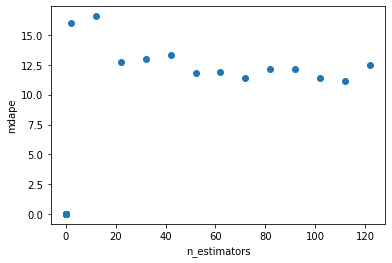

In [14]:
x = [0] * 130
y = [0] * 130

for i in range (2, 131, 10):
    x[i-1] = i
    rf3 = RandomForestClassifier(n_estimators = i)
    rf3.fit(X_train, Y_train)
    MdAPE_test3 = np.median((np.abs(np.subtract(Y_test,rf3.predict(X_test))/Y_test)))*100
    y[i-1] = MdAPE_test3
    
plt.plot(x, y, "o")
plt.xlabel("n_estimators")
plt.ylabel("mdape")
plt.show()

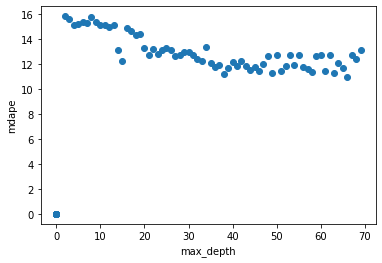

In [21]:
x = [0] * 130
y = [0] * 130

for i in range (2, 70):
    x[i-1] = i
    rf4 = RandomForestClassifier(max_depth = i)
    rf4.fit(X_train, Y_train)
    MdAPE_test3 = np.median((np.abs(np.subtract(Y_test,rf4.predict(X_test))/Y_test)))*100
    y[i-1] = MdAPE_test3
    
plt.plot(x, y, "o")
plt.xlabel("max_depth")
plt.ylabel("mdape")
plt.show()